In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [2]:
Hg_sp2 = np.asarray(pandas.read_csv('Hg2nd.csv',skipinitialspace=True))

In [19]:
Hg_sp2 = np.asarray(Hg_sp2)

[[2.20000000e-04 9.99993960e-01]
 [3.20000000e-04 9.99993960e-01]
 [4.20000000e-04 9.99993960e-01]
 ...
 [1.70659968e+02 9.74900000e-05]
 [1.70660068e+02 9.75200000e-05]
 [1.70660168e+02 9.75400000e-05]]


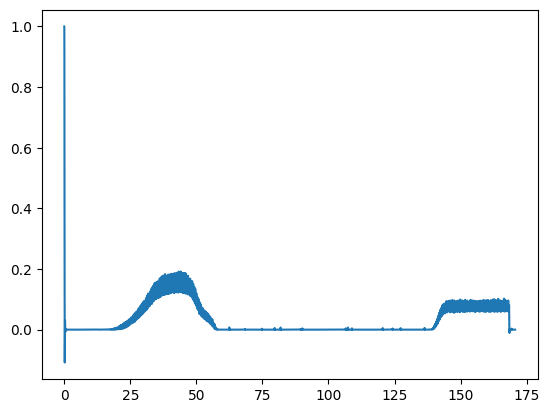

In [20]:
plt.plot(Hg_sp2[:,0],Hg_sp2[:,1])

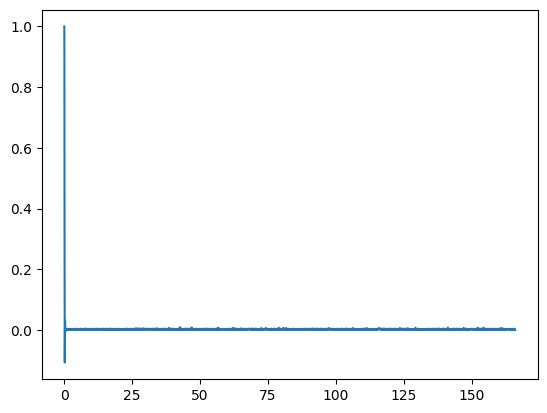

In [21]:
Hg_sp3 = np.asarray(pandas.read_csv('Hg3rd.csv',skipinitialspace=True))
plt.plot(Hg_sp3[:,0],Hg_sp3[:,1])

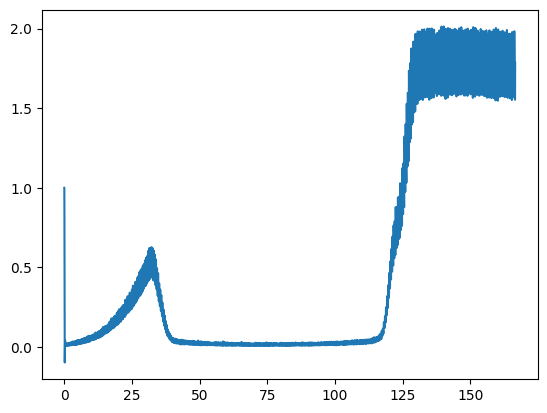

In [22]:
Hg_sp1 = np.asarray(pandas.read_csv('Hg1st.csv',skipinitialspace=True))
plt.plot(Hg_sp1[:,0],Hg_sp1[:,1])

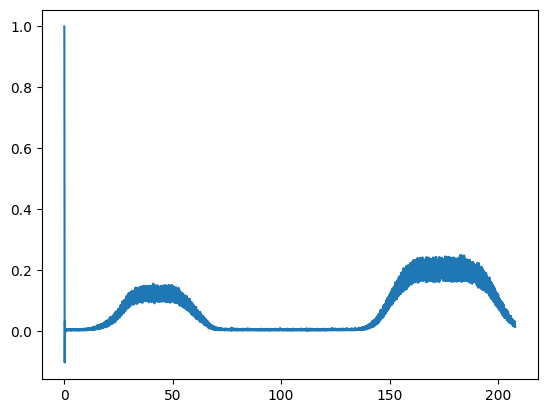

In [23]:
Hg_sp4 = np.asarray(pandas.read_csv('Hg4th.csv',skipinitialspace=True))
plt.plot(Hg_sp4[:,0],Hg_sp4[:,1])

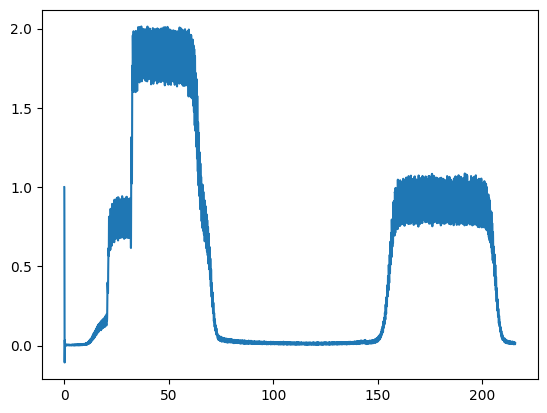

In [24]:
Hg_sp5 = np.asarray(pandas.read_csv('Hg5th.csv',skipinitialspace=True))
plt.plot(Hg_sp5[:,0],Hg_sp5[:,1])

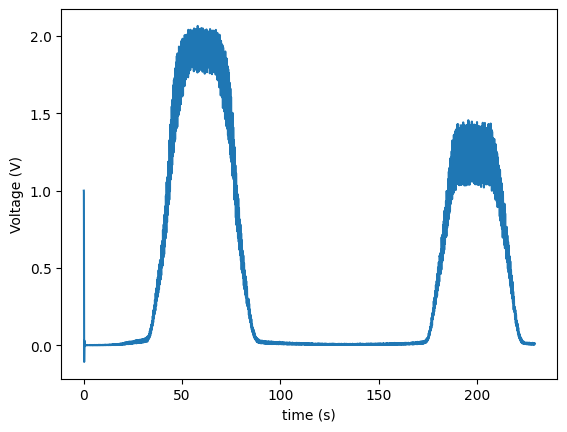

In [142]:
Hg_sp6 = np.asarray(pandas.read_csv('Hg6th.csv',skipinitialspace=True))
plt.plot(Hg_sp6[:,0],Hg_sp6[:,1])
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
plt.show()

In [161]:
def plot_spec(names):
    for n in names:
        HD1_01 = np.asarray(pandas.read_csv(f'{n}.csv',skipinitialspace=True))
        plt.plot(HD1_01[:,0],HD1_01[:,1], lable='1000nA')
        plt.xlabel('time (s)')
        plt.ylabel('Voltage (V)')
        plt.show()

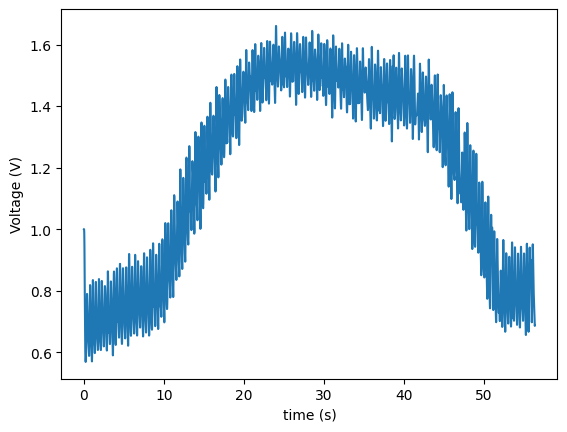

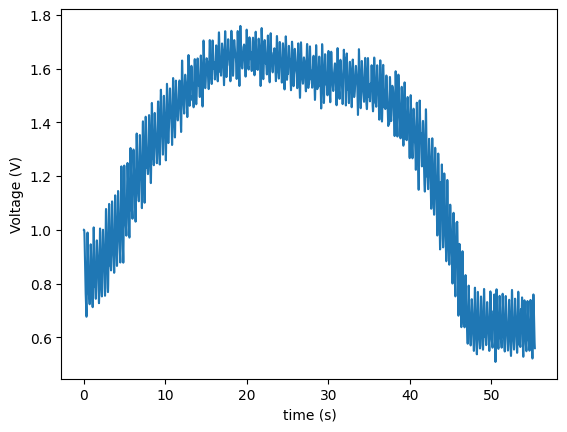

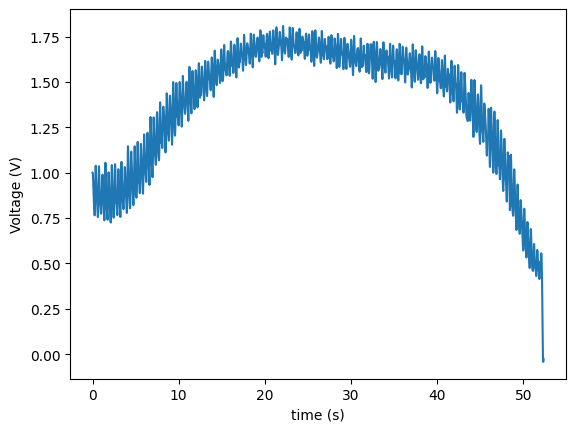

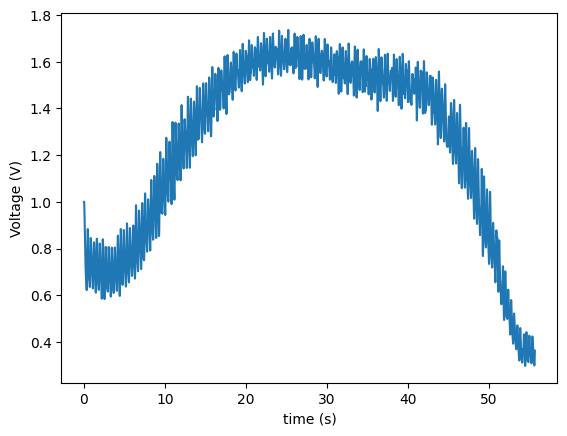

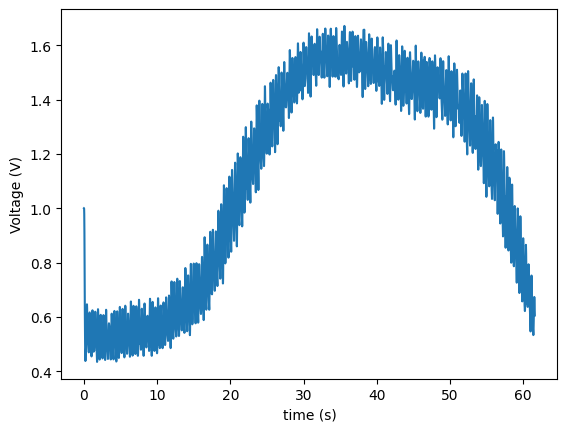

In [155]:
plot_spec(['HD1_01','HD1_02','HD1_03','HD1_04','HD1_05'])


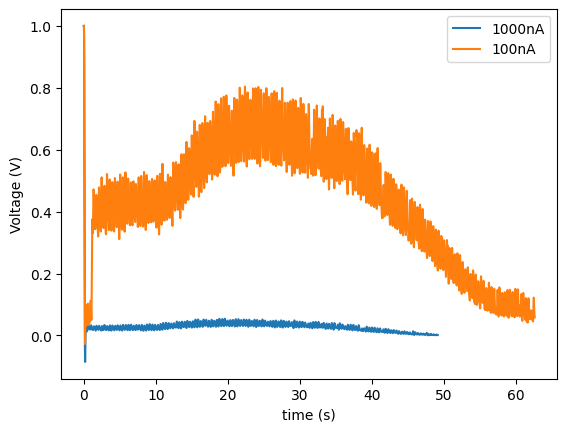

In [164]:

HD3_01 = np.asarray(pandas.read_csv('HD3_01.csv',skipinitialspace=True))
HD3_04 = np.asarray(pandas.read_csv('HD3_04.csv',skipinitialspace=True))
plt.plot(HD3_01[:,0],HD3_01[:,1], label='1000nA')
plt.plot(HD3_04[:,0],HD3_04[:,1], label='100nA')
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

In [7]:
from scipy.optimize import curve_fit
from scipy.stats import truncnorm

def normal(x, x0, sigma, A): 
    return A*truncnorm.pdf(x,loc=x0,scale=sigma,a=(x[0] - x0)/sigma,b=(x[-1] - x0)/sigma)

def divide_data(x,y,t_divide):
    H_x = []
    H_y = []
    D_x = []
    D_y = []
    for i, x_i in enumerate(x):
        if x_i<t_divide:
            D_x.append(x_i)
            D_y.append(y[i])
        else:
            H_x.append(x_i)
            H_y.append(y[i])
            
    return np.asarray(H_x),np.asarray(H_y),np.asarray(D_x),np.asarray(D_y)
            

In [133]:
H_x, H_y, D_x, D_y = divide_data(HD1_01[:,0],HD1_01[:,1],35)
popt_D,pcov_D = curve_fit(normal,D_x,D_y)
popt_H,pcov_H = curve_fit(normal,H_x,H_y)

In [134]:
print(popt_D,popt_H)

[28.84709212 19.69641617 41.76306256] [37.47160291 14.8297508  25.19224356]


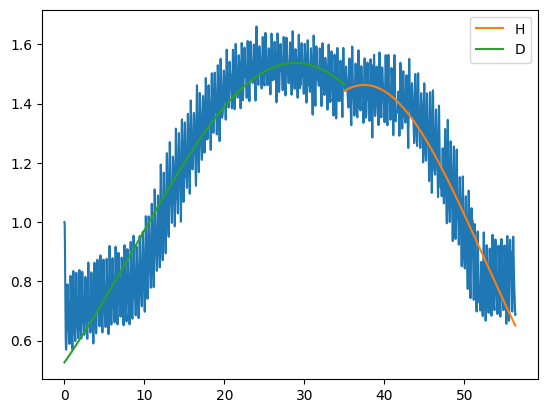

In [135]:
plt.plot(HD1_01[:,0],HD1_01[:,1])
plt.plot(H_x,normal(H_x,*popt_H),label='H')
plt.plot(D_x,normal(D_x,*popt_D),label='D')
#plt.plot(H_x,H_y,label='H')
#plt.plot(D_x,D_y,label='D')
plt.legend()

In [16]:
def fitting(HD,t_divide):
    H_x, H_y, D_x, D_y = divide_data(HD[:,0],HD[:,1],t_divide)
    popt_D,pcov_D = curve_fit(normal,D_x,D_y)
    popt_H,pcov_H = curve_fit(normal,H_x,H_y)
    print(popt_D,popt_H)
    plt.plot(HD[:,0],HD[:,1])
    plt.plot(H_x,normal(H_x,*popt_H),label='H')
    plt.plot(D_x,normal(D_x,*popt_D),label='D')
    plt.legend()

def read_in(filename):
    HD = np.asarray(pandas.read_csv(f'{filename}.csv',skipinitialspace=True))
    return HD

[28.84709212 19.69641617 41.76306256] [37.47160291 14.8297508  25.19224356]


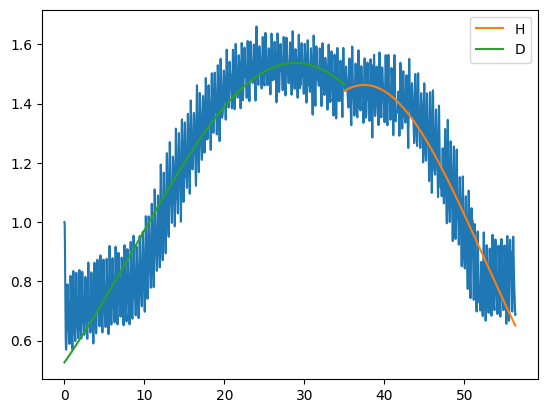

In [137]:
fitting(HD1_01,35)

[6.72042703 5.79609136 3.81964111] [26.36900998 16.71079482 22.9871714 ]


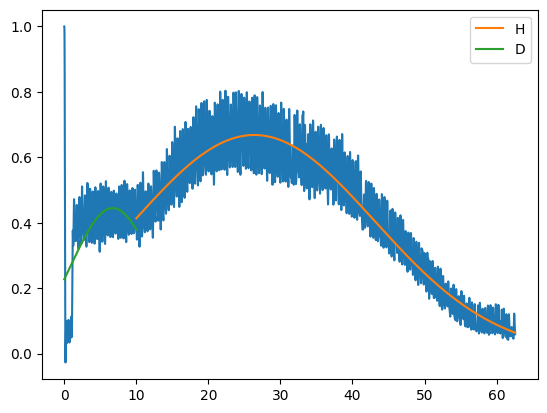

In [10]:
HD3_04 = np.asarray(pandas.read_csv('HD3_04.csv',skipinitialspace=True))
HD3_03 = np.asarray(pandas.read_csv('HD3_03.csv',skipinitialspace=True))
fitting(HD3_04, 10)

[6.20900241 3.68857457 3.0899067 ] [17.29533209 17.60566424 17.36723751]


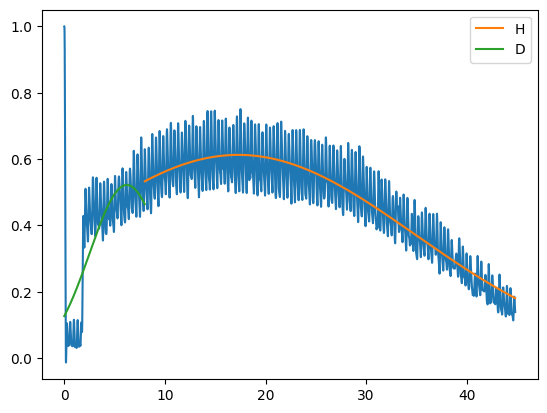

In [12]:
fitting(HD3_03, 8)

[6.58048311e+03 1.21450034e+03 5.33685505e+00] [ 9.43871306 17.71003463 11.68294564]


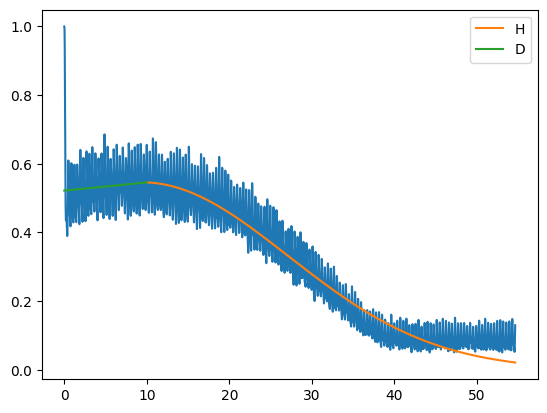

In [17]:
HD3_05 = read_in('HD3_05')
fitting(HD3_05,10)

[2.00291721e+06 7.71045932e+03 1.16860380e+01] [66.18464442 17.31394913  8.09029553]


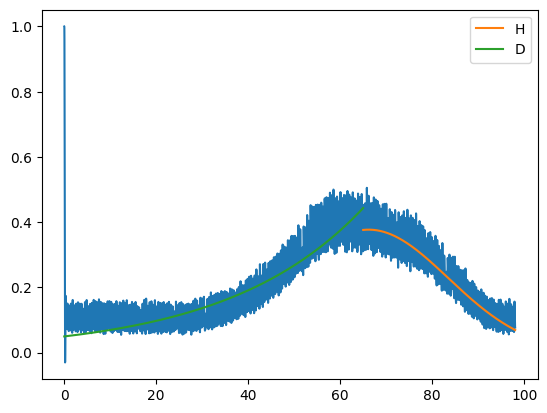

In [20]:
HD3_06 = read_in('HD3_06')
fitting(HD3_06,65)

[-1.75368755e+05  1.68931256e+04  2.16588749e+01] [51.0587218  51.64903819 13.30302645]


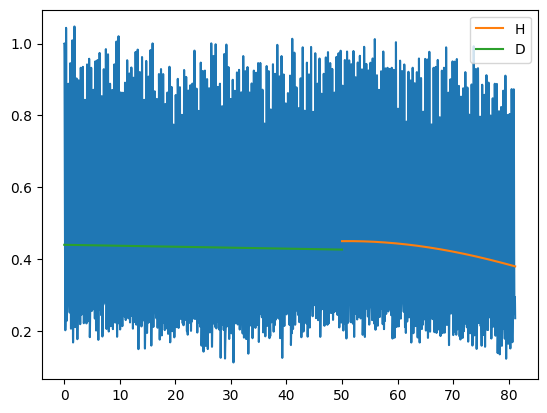

In [21]:
HD5_01 = read_in('HD5_01')
fitting(HD5_01,50)

[ -7.00308981 125.13899544  22.79168055] [51.87703393 31.0782487   5.86006826]


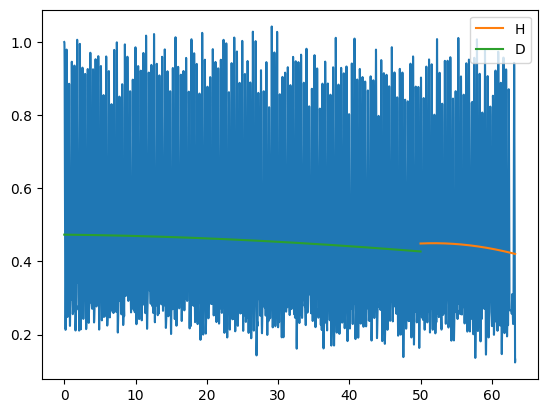

In [22]:
HD6_01 = read_in('HD6_01')
fitting(HD6_01,50)

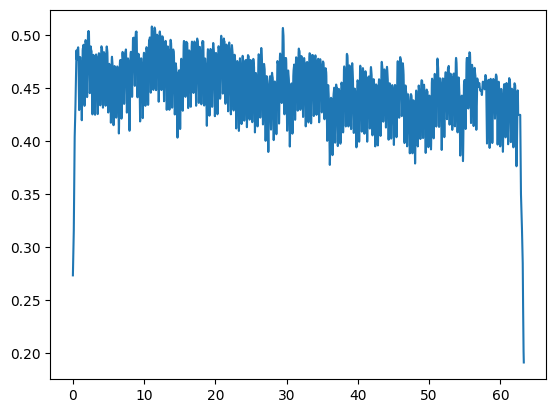

In [41]:
from scipy.signal import savgol_filter

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#plt.plot(HD6_01[:,0], savgol_filter(HD6_01[:,1],10000,3))
plt.plot(HD6_01[:,0], smooth(HD6_01[:,1],10000))

In [39]:
HD6_01[:,1].shape

(623499,)

[43.83303482 43.10338269 43.6087384 ] [-5.48857805e+05  6.84338939e+03  2.28356642e+01]


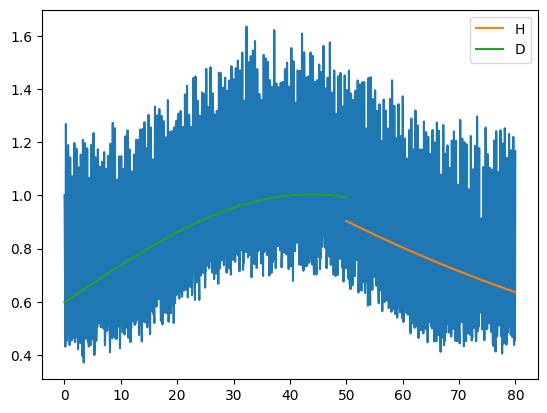

In [29]:
HD4_05 = read_in('HD4_05')
fitting(HD4_05,50)

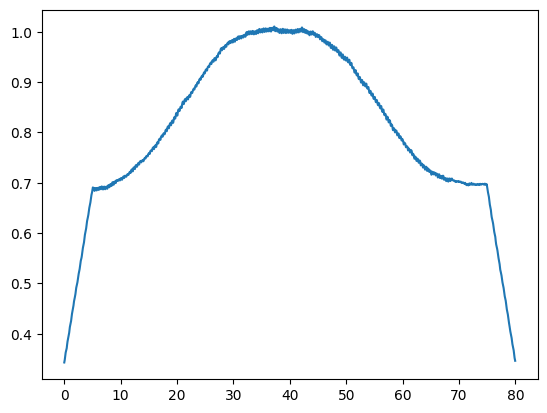

In [43]:
plt.plot(HD4_05[:,0], smooth(HD4_05[:,1],100000))

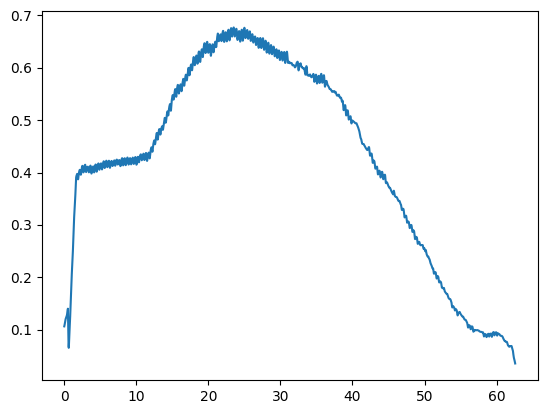

In [45]:
plt.plot(HD3_04[:,0], smooth(HD3_04[:,1],10000))

In [64]:
from scipy.interpolate import splrep, BSpline

def intpl_smooth(filename):
    tck_s = splrep(filename[:,0], filename[:,1], s=len(filename[:,0])/100)
    plt.plot(filename[:,0], filename[:,1])
    plt.plot(filename[:,0], BSpline(*tck_s)(filename[:,0]), '-')

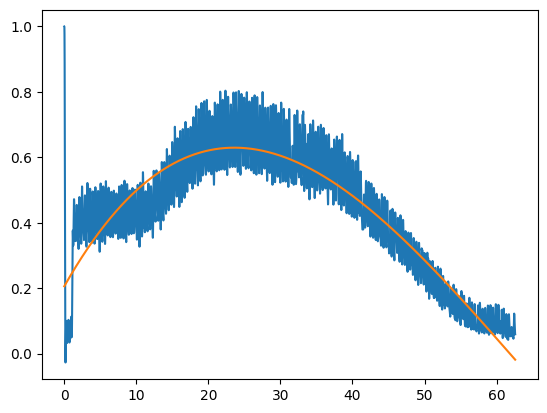

In [65]:
intpl_smooth(HD3_04)

In [96]:
from numpy.polynomial.legendre import legvander,legval

deg=4
V=legvander(HD3_04[:,0],deg)
coeffs=np.linalg.lstsq(V,HD3_04[:,1],rcond=None)[0]
g=legval(HD3_04[:,0],coeffs)

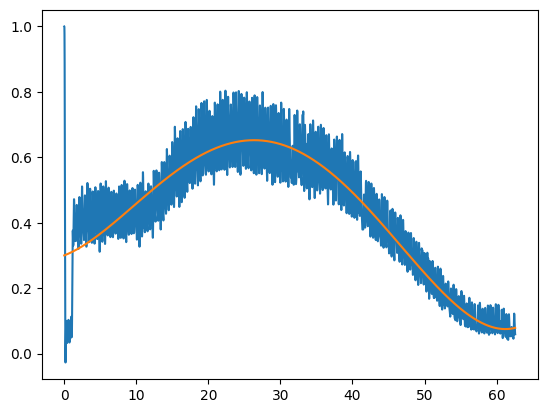

In [97]:
plt.plot(HD3_04[:,0],HD3_04[:,1])
plt.plot(HD3_04[:,0],g)

/var/folders/dn/10mwq12x74dfdvjf9n7rqkth0000gn/T/ipykernel_49205/782854313.py:1: RankWarning: Polyfit may be poorly conditioned
  p30 = np.poly1d(np.polyfit(HD3_04[:,0],HD3_04[:,1], 30))


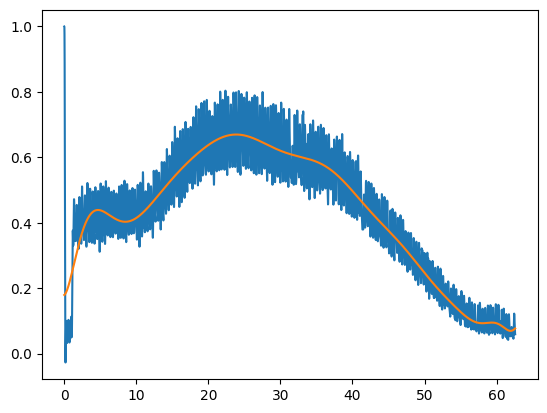

In [98]:
def poly_fit(name):
    p30 = np.poly1d(np.polyfit(name[:,0],name[:,1], 30))
    plt.plot(name[:,0],name[:,1])
    plt.plot(name[:,0],p30(name[:,0]))

/var/folders/dn/10mwq12x74dfdvjf9n7rqkth0000gn/T/ipykernel_49205/3431582900.py:1: RankWarning: Polyfit may be poorly conditioned
  p30 = np.poly1d(np.polyfit(HD4_05[:,0],HD4_05[:,1], 30))


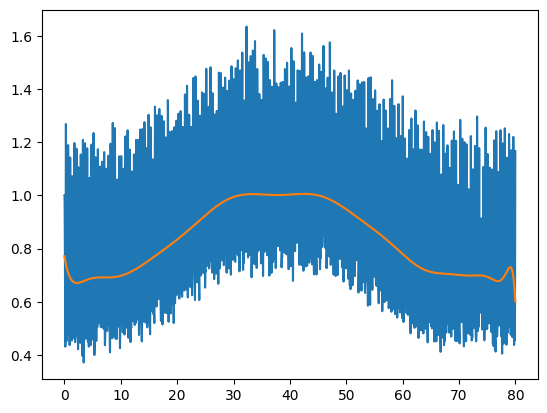

In [99]:
p30 = np.poly1d(np.polyfit(HD4_05[:,0],HD4_05[:,1], 30))
plt.plot(HD4_05[:,0],HD4_05[:,1])
plt.plot(HD4_05[:,0],p30(HD4_05[:,0]))

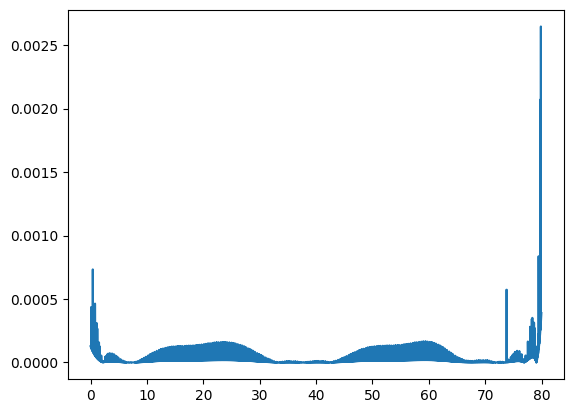

In [110]:
plt.plot(HD4_05[:,0],np.abs(np.gradient(p30(HD4_05[:,0]),0.1)))

In [122]:
gr = np.abs(np.gradient(p30(HD4_05[:,0])))
print(np.sort(gr))

[2.49467114e-13 9.19486709e-13 2.12230233e-12 ... 2.07059343e-04
 2.64621093e-04 2.64683769e-04]


TypeError: where() got an unexpected keyword argument 'gr'

In [140]:
n = 5
gr_small = []
ind_small = []
min_ind = sorted(range(len(gr)), key=lambda k: gr[k])
for i in np.arange(n):
    gr_small.append(np.sort(gr)[i])
gr_small = [np.sort(gr)[0],np.sort(gr)[1],np.sort(gr)[2],np.sort(gr)[3],np.sort(gr)[4],np.sort(gr)[5],np.sort(gr)[6]]
ind_small = [min_ind[0],min_ind[1],min_ind[2],min_ind[3],min_ind[4],min_ind[5],min_ind[6]]

In [133]:
gr_small

[2.4946711363327267e-13,
 9.194867089945546e-13,
 2.1223023338734492e-12,
 3.141042981269493e-12,
 4.484523863368395e-12]

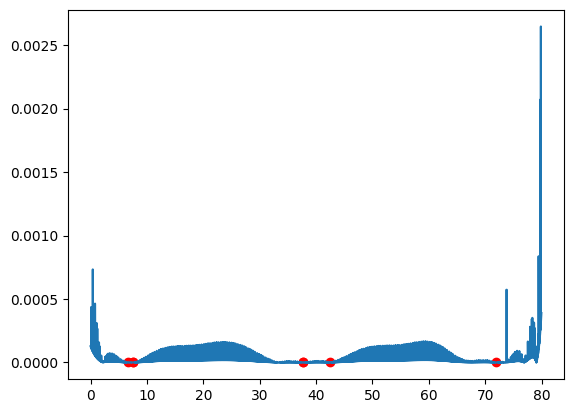

In [141]:
plt.scatter(HD4_05[ind_small,0],gr_small,color='r')
plt.plot(HD4_05[:,0],np.abs(np.gradient(p30(HD4_05[:,0]),0.1)))